In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import randint
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
dataframe = pd.read_csv('Churn_Modelling.csv')

In [30]:
dataframe.shape

(10000, 14)

In [31]:
dataframe.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8570,8571,15711457,Herz,755,France,Female,28,7,124540.28,1,0,1,188850.89,0
3646,3647,15610900,Thompson,770,France,Female,70,9,110738.89,1,1,0,22666.77,1
5212,5213,15621611,Gibson,742,Germany,Male,55,5,155196.17,1,0,1,121207.66,1


In [32]:
print(dataframe.RowNumber.nunique())
print(dataframe.CustomerId.nunique())
print(dataframe.Surname.nunique())

10000
10000
2932


In [33]:
df = dataframe.copy()

In [34]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [36]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [37]:
df.Geography.nunique()

3

In [38]:
df.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3818,3819,15740147,Cremonesi,725,France,Female,44,10,0.00,1,0,1,93777.61,0
3786,3787,15728224,Kerr,710,Germany,Female,41,9,149155.53,2,1,0,42131.26,1
6136,6137,15773071,Serena,780,Spain,Female,33,6,145580.61,1,1,1,154598.56,0


<Axes: xlabel='Age', ylabel='Count'>

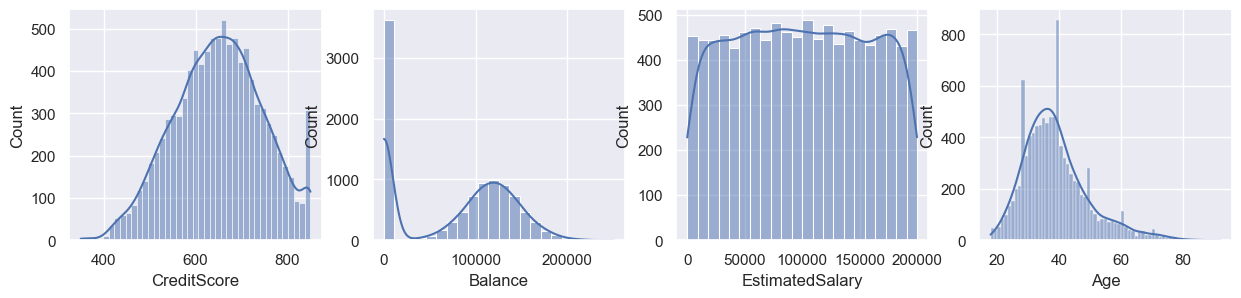

In [39]:
fig, ax = plt.subplots(1, 4, figsize=[15, 3])

sns.histplot(data=df, x='CreditScore', ax=ax[0], kde=True)
sns.histplot(data=df, x='Balance', ax=ax[1], kde=True)
sns.histplot(data=df, x='EstimatedSalary', ax=ax[2], kde=True)
sns.histplot(data=df, x='Age', ax=ax[3], kde=True)

In [55]:
X,y = (df.drop(columns='Exited'), df.Exited)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def categorize_age(x):
    if 18 <= x <= 35:
        return 'Young Adult'
    elif 36 <= x <= 50:
        return 'Adult'
    elif 51 <= x <= 65:
        return 'Middle-Aged'
    elif 66 <= x <= 92:
        return 'Senior'
    else:
        return 'Unknown'

In [58]:
def age_to_cat(input_df):
    input_df['Age'] = input_df['Age'].apply(lambda x: 'Young Adult' if (18 <= x <= 35) else 'Adult' if (36 <= x <= 50) else 'Middle-Aged' if (51 <= x <= 65) else 'Senior' if (66 <= x <= 92) else 'Unknown')

    return input_df



class ImputeTransformer():

    def __init__(self, func) -> None:
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)
    
    def fit(self, X, y=None, **fit_params):
        return self

In [59]:
drop_feat = ['RowNumber', 'CustomerId', 'Surname']
numeric_feat = ['CreditScore', 'Balance', 'EstimatedSalary']
categorical_feat = ['Age', 'Geography', 'Gender']
num_cat_feat = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

In [60]:
drop_transformer = ColumnTransformer(transformers=[('drop_columns', 'drop', drop_feat)], remainder='passthrough')

numeric_transformer = Pipeline(steps=[
    ('stdscaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('age_to_cat', ImputeTransformer(age_to_cat)),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])




col_transformer = ColumnTransformer(transformers=[
    ('drop_columns', 'drop', drop_feat),
    ('numeric_processing', numeric_transformer, numeric_feat),
    ('categorical_processing', categorical_transformer, categorical_feat)
], remainder='passthrough')

In [64]:
pipeline_lr = Pipeline([
    ('transform_columns', col_transformer),
    ('logistic', LogisticRegression())
])

In [65]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('transform_columns',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['RowNumber', 'CustomerId',
                                                   'Surname']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Balance',
                                                   'EstimatedSalary']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('age_to_cat',
                                                                   <__main__.ImputeTransformer object at 0x0000025EB93E7850>),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Age', 'Geography',
                                                   'Gender'])])),
                ('logistic', LogisticRegression())])

In [68]:
accuracy_score(y_true=y_test, y_pred=pipeline_lr.predict(X_test))

0.824

In [69]:
pipeline_svc = Pipeline([
    ('transform_columns', col_transformer),
    ('svc', SVC())
])

In [70]:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('transform_columns',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['RowNumber', 'CustomerId',
                                                   'Surname']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Balance',
                                                   'EstimatedSalary']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('age_to_cat',
                                                                   <__main__.ImputeTransformer object at 0x0000025EB93E7850>),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Age', 'Geography',
                                                   'Gender'])])),
                ('svc', SVC())])

In [71]:
accuracy_score(y_true=y_test, y_pred=pipeline_svc.predict(X_test))

0.831

In [73]:
pipeline_gbc = Pipeline([
    ('transform_columns', col_transformer),
    ('gbc', GradientBoostingClassifier())
])

In [74]:
pipeline_gbc.fit(X_train, y_train)

Pipeline(steps=[('transform_columns',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['RowNumber', 'CustomerId',
                                                   'Surname']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Balance',
                                                   'EstimatedSalary']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('age_to_cat',
                                                                   <__main__.ImputeTransformer object at 0x0000025EB93E7850>),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Age', 'Geography',
                                                   'Gender'])])),
                ('gbc', GradientBoostingClassifier())])

In [75]:
accuracy_score(y_true=y_test, y_pred=pipeline_gbc.predict(X_test))

0.855

In [79]:
gbc_param_dist = {
    'gbc': [GradientBoostingClassifier()],
    'gbc__n_estimators': randint(50, 200),
    'gbc__learning_rate': [0.01, 0.1, 0.2],
    'gbc__max_depth': randint(3, 6),
    'gbc__min_samples_split': randint(2, 5),
    'gbc__min_samples_leaf': randint(1, 4)
}

In [80]:
gbc_random_search = RandomizedSearchCV(estimator=pipeline_gbc, param_distributions=gbc_param_dist, cv=5, verbose=1, n_jobs=1)

gbc_best_model = gbc_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [81]:
gbc_best_model.best_params_

{'gbc': GradientBoostingClassifier(),
 'gbc__learning_rate': 0.1,
 'gbc__max_depth': 3,
 'gbc__min_samples_leaf': 2,
 'gbc__min_samples_split': 4,
 'gbc__n_estimators': 189}

In [82]:
gbc_best_model.best_score_

0.8542500000000001